# Name:Tejas Shenoy
# Github Username: Tejas-1310
# USC ID:3537349347

**Importing Libraries**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from skimage import io
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib
import numpy
import argparse
import cv2
import pickle
import os


**i.	Images in each class are given in separate folders in the folder Sport  Images. We have several hundreds of images for five classes of sport activities, namely baseball, basketball, fencing, tennis, and volleyball**.


**ii.	Randomly select [0.7ni| images from each folder as your training set, [0.15ni| as validation set, and the rest as your test set, where ni is the number of images in folder i and [x| is the ceiling of x.**


**iii.	In order for all the images to have the same size, zero-pad or resize the images in your dataset. This can be done using various tools, including OpenCV.**


In [ ]:
from imutils import paths
LABELS = set(["Baseball", "Basketball","Fencing","Tennis", "Volleyball"])
imagePaths = list(paths.list_images("/content/drive/MyDrive/data/SportImages"))
data = []
labels = []
for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]
	if label not in LABELS:
		continue
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	data.append(image)
	labels.append(label)

In [ ]:
import os
import cv2
import random

#  path to the folder containing the sport images
path_to_images = "/content/drive/MyDrive/data/SportImages"

#  target size for the images
target_size = (224, 224)

# create empty lists for each class
baseball_images = []
basketball_images = []
fencing_images = []
tennis_images = []
volleyball_images = []

# loop through each folder and append the images to the appropriate list
for folder in os.listdir(path_to_images):
    if folder == "Baseball":
        baseball_images.extend([os.path.join(path_to_images, folder, image) for image in os.listdir(os.path.join(path_to_images, folder))])
    elif folder == "Basketball":
        basketball_images.extend([os.path.join(path_to_images, folder, image) for image in os.listdir(os.path.join(path_to_images, folder))])
    elif folder == "Fencing":
        fencing_images.extend([os.path.join(path_to_images, folder, image) for image in os.listdir(os.path.join(path_to_images, folder))])
    elif folder == "Tennis":
        tennis_images.extend([os.path.join(path_to_images, folder, image) for image in os.listdir(os.path.join(path_to_images, folder))])
    elif folder == "Volleyball":
        volleyball_images.extend([os.path.join(path_to_images, folder, image) for image in os.listdir(os.path.join(path_to_images, folder))])

# shuffle the images in each list
random.shuffle(baseball_images)
random.shuffle(basketball_images)
random.shuffle(fencing_images)
random.shuffle(tennis_images)
random.shuffle(volleyball_images)

# create empty list for the resized images
resized_images = []
resized_baseball_images = []
resized_basketball_images = []
resized_volleyball_images = []
resized_fencing_images = []
resized_tennis_images = []

# create a list of tuples containing the image list and the corresponding resized image list
image_lists = [
    (baseball_images, resized_baseball_images),
    (basketball_images, resized_basketball_images),
    (fencing_images, resized_fencing_images),
    (tennis_images, resized_tennis_images),
    (volleyball_images, resized_volleyball_images)
]

# loop through each image list and resize
for image_list, resized_image_list in image_lists:
    for image_path in image_list:
        try:
            # load the image and resize
            image = cv2.imread(image_path)
            image = cv2.resize(image, target_size)

            # append to the list of resized images
            resized_images.append(image)
            resized_image_list.append(image)
        except:
            # skip the image if an exception is raised
            continue




# #resize the images to the target size and store them in a new list
# resized_basketball_images = [cv2.resize(cv2.imread(image_path), target_size) for image_path in basketball_images]
# resized_fencing_images = [cv2.resize(cv2.imread(image_path), target_size) for image_path in fencing_images]
# resized_tennis_images = [cv2.resize(cv2.imread(image_path), target_size) for image_path in tennis_images]
# resized_volleyball_images = [cv2.resize(cv2.imread(image_path), target_size) for image_path in volleyball_images]

num_baseball = len(resized_baseball_images)
num_basketball = len(resized_basketball_images)
num_fencing = len(resized_fencing_images)
num_tennis = len(resized_tennis_images)
num_volleyball = len(resized_volleyball_images)



# split the images into training, validation, and test sets
train_baseball = resized_baseball_images[:int(0.7 * num_baseball)]
val_baseball = resized_baseball_images[int(0.7 * num_baseball):int(0.85 * num_baseball)]
test_baseball = resized_baseball_images[int(0.85 * num_baseball):]

train_basketball = resized_basketball_images[:int(0.7 * num_basketball)]
val_basketball = resized_basketball_images[int(0.7 * num_basketball):int(0.85 * num_basketball)]
test_basketball = resized_basketball_images[int(0.85 * num_basketball):]

train_fencing = resized_fencing_images[:int(0.7 * num_fencing)]
val_fencing = resized_fencing_images[int(0.7 * num_fencing):int(0.85 * num_fencing)]
test_fencing = resized_fencing_images[int(0.85 * num_fencing):]

train_tennis = resized_tennis_images[:int(0.7 * num_tennis)]
val_tennis = resized_tennis_images[int(0.7 * num_tennis):int(0.85 * num_tennis)]
test_tennis= resized_tennis_images[int(0.85 * num_tennis):]

train_volleyball = resized_volleyball_images[:int(0.7 * num_volleyball)]
val_volleyball = resized_volleyball_images[int(0.7 * num_volleyball):int(0.85 * num_volleyball)]
test_volleyball= resized_volleyball_images[int(0.85 * num_volleyball):]




In [ ]:

data = np.load('preprocessed_images.npz', allow_pickle=True)

train_baseball = data['train_baseball']
train_basketball = data['train_basketball']
train_fencing = data['train_fencing']
train_tennis = data['train_tennis']
train_volleyball= data['train_volleyball']

train_images = np.concatenate((train_baseball, train_basketball, train_fencing, train_tennis,train_volleyball), axis=0)

In [ ]:
import numpy as np

data = np.load('preprocessed_images.npz', allow_pickle=True)

val_baseball = data['val_baseball']
val_basketball = data['val_basketball']
val_fencing = data['val_fencing']
val_tennis = data['val_tennis']
val_volleyball= data['val_volleyball']

val_images = np.concatenate((val_baseball, val_basketball, val_fencing, val_tennis,val_volleyball), axis=0)

In [ ]:
labels

['Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',
 'Baseball',

In [ ]:


# Convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
trainX, testX, trainY, testY = train_test_split(
    data, labels, test_size=0.25, stratify=labels, random_state=42
)

In [ ]:

trainAug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
valAug = ImageDataGenerator(preprocessing_function=preprocess_input)
trainAug = ImageDataGenerator(rotation_range=30,
zoom_range=0.15,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.15,
horizontal_flip=True,
fill_mode="nearest",
preprocessing_function=preprocess_input)

**(e)	Transfer Learning for Image Classification ResNet50**





In [ ]:
base_model = ResNet50(weights="imagenet", include_top=False,
input_tensor=Input(shape=(224, 224, 3)))
for layer in base_model.layers:
	layer.trainable = False
head_model = base_model.output
head_model = AveragePooling2D(pool_size=(7, 7))(head_model)
head_model = Flatten(name="flatten")(head_model)
head_model = Dense(512, activation="relu")(head_model)
head_model = Dropout(0.5)(head_model)
head_model = Dense(num_classes, activation="softmax")(head_model)
model = Model(inputs=base_model.input, outputs=head_model)
opt = Adam(learning_rate=INIT_LR)
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
train_aug.mean = mean
val_aug.mean = mean


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
len(trainX)

2446

**iv.	Train the networks ResNet50, EfficientNetB0, and VGG16 for at least 50 epochs (preferably 100 epochs) and perform early stopping using the valida- tion set. Keep the network parameters that have the lowest validation error. Plot the training and validation errors vs. epochs.**



**v.	Report the Confusion Matrix, Precision, Recall, Accuracy, and F1 score for your model on both training and test sets. Remember that this is a multi-class classification problem.**


In [ ]:


epochs=50
opt = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9, decay=1e-4 / 25)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print("compiling model...")
print("training head...")
H = model.fit(
x=trainAug.flow(trainX, trainY, batch_size=32),
steps_per_epoch=len(trainX) // 32,
validation_data=valAug.flow(testX, testY),
validation_steps=len(testX) // 32,
epochs=epochs)

compiling model...
[training head...


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
76/76 [==============================] - 35s 319ms/step - loss: 2.0029 - accuracy: 0.2784 - val_loss: 1.2027 - val_accuracy: 0.5200
Epoch 2/50
76/76 [==============================] - 24s 310ms/step - loss: 1.4067 - accuracy: 0.4519 - val_loss: 0.9017 - val_accuracy: 0.6787
Epoch 3/50
76/76 [==============================] - 24s 309ms/step - loss: 1.1831 - accuracy: 0.5539 - val_loss: 0.7504 - val_accuracy: 0.7575
Epoch 4/50
76/76 [==============================] - 24s 314ms/step - loss: 1.0546 - accuracy: 0.6036 - val_loss: 0.6710 - val_accuracy: 0.7837
Epoch 5/50
76/76 [==============================] - 24s 315ms/step - loss: 0.9427 - accuracy: 0.6483 - val_loss: 0.6133 - val_accuracy: 0.8025
Epoch 6/50
76/76 [==============================] - 23s 308ms/step - loss: 0.8892 - accuracy: 0.6823 - val_loss: 0.5561 - val_accuracy: 0.8275
Epoch 7/50
76/76 [==============================] - 24s 309ms/step - loss: 0.8169 - accuracy: 0.6972 - val_loss: 0.5353 - val_accuracy: 0.8225

26/26 [==============================] - 1s 18ms/step
              precision    recall  f1-score   support

    Baseball       0.93      0.92      0.93       183
  Basketball       0.91      0.90      0.91       122
     Fencing       0.91      0.93      0.92       156
      Tennis       0.93      0.94      0.94       179
  Volleyball       0.92      0.91      0.91       176

    accuracy                           0.92       816
   macro avg       0.92      0.92      0.92       816
weighted avg       0.92      0.92      0.92       816



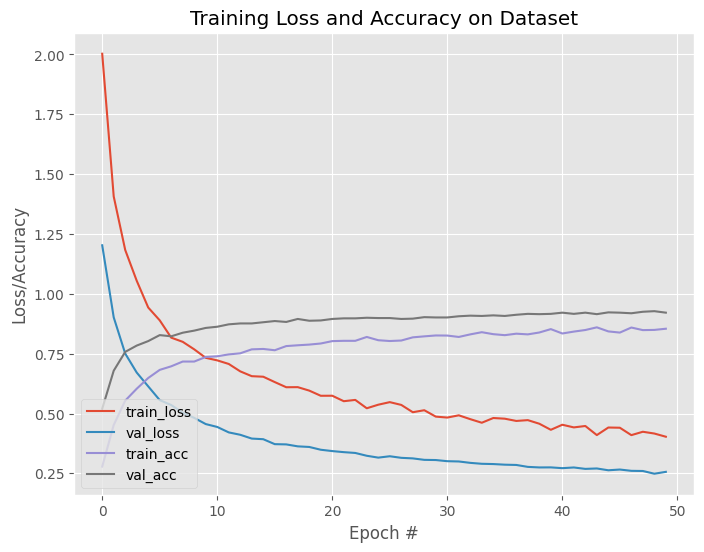

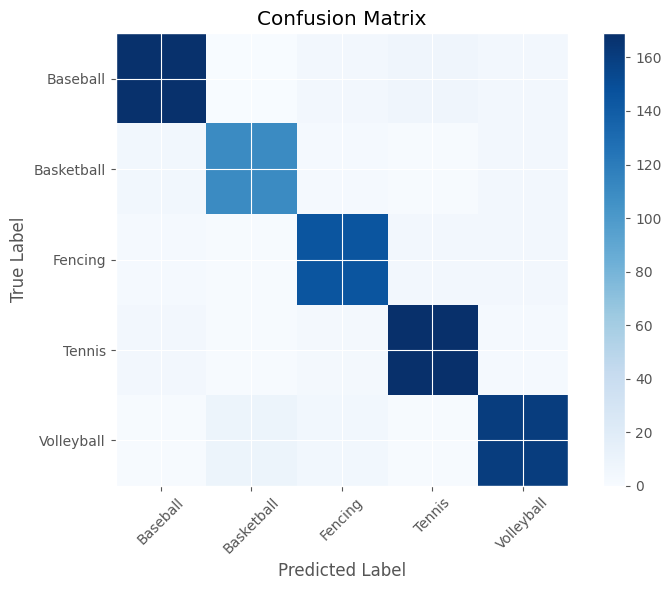

26/26 [==============================] - 0s 17ms/step
Confusion Matrix:
[[168   0   4   7   4]
 [  5 110   2   1   4]
 [  2   1 145   4   4]
 [  4   1   3 169   2]
 [  1   9   5   1 160]]


<Figure size 640x480 with 0 Axes>

In [ ]:



predictions = model.predict(x=testX.astype("float32"), batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=lb.classes_))

N = epochs
plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
cm = confusion_matrix(testY.argmax(axis=1), predictions.argmax(axis=1))
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=45)
plt.yticks(tick_marks, lb.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()
plt.savefig("plot.png")

from sklearn.metrics import confusion_matrix
predictions = model.predict(x=testX.astype("float32"), batch_size=32)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)
cm = confusion_matrix(true_labels, pred_labels)


print("Confusion Matrix:")
print(cm)



EfficientNetB0

In [ ]:


baseModel = EfficientNetB0(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:

epochs=50
opt = tf.keras.optimizers.legacy.SGD(lr=1e-4, momentum=0.9, decay=1e-4 / 25)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

H = model.fit(
	x=trainAug.flow(trainX, trainY, batch_size=32),
	steps_per_epoch=len(trainX) // 32,
	validation_data=valAug.flow(testX, testY),
	validation_steps=len(testX) // 32,
	epochs=epochs)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
76/76 [==============================] - 32s 334ms/step - loss: 1.6446 - accuracy: 0.2465 - val_loss: 1.4771 - val_accuracy: 0.3650
Epoch 2/50
76/76 [==============================] - 24s 319ms/step - loss: 1.4648 - accuracy: 0.3848 - val_loss: 1.3080 - val_accuracy: 0.6150
Epoch 3/50
76/76 [==============================] - 24s 319ms/step - loss: 1.3201 - accuracy: 0.5004 - val_loss: 1.1796 - val_accuracy: 0.7450
Epoch 4/50
76/76 [==============================] - 24s 318ms/step - loss: 1.2030 - accuracy: 0.5874 - val_loss: 1.0695 - val_accuracy: 0.8075
Epoch 5/50
76/76 [==============================] - 24s 317ms/step - loss: 1.1383 - accuracy: 0.6367 - val_loss: 0.9764 - val_accuracy: 0.8413
Epoch 6/50
76/76 [==============================] - 24s 318ms/step - loss: 1.0600 - accuracy: 0.6690 - val_loss: 0.9000 - val_accuracy: 0.8637
Epoch 7/50
76/76 [==============================] - 24s 316ms/step - loss: 0.9714 - accuracy: 0.7154 - val_loss: 0.8309 - val_accuracy: 0.8788

26/26 [==============================] - 2s 18ms/step
              precision    recall  f1-score   support

    Baseball       0.94      0.96      0.95       183
  Basketball       0.95      0.92      0.93       122
     Fencing       0.97      0.90      0.93       156
      Tennis       0.94      0.96      0.95       179
  Volleyball       0.93      0.96      0.94       176

    accuracy                           0.94       816
   macro avg       0.94      0.94      0.94       816
weighted avg       0.94      0.94      0.94       816



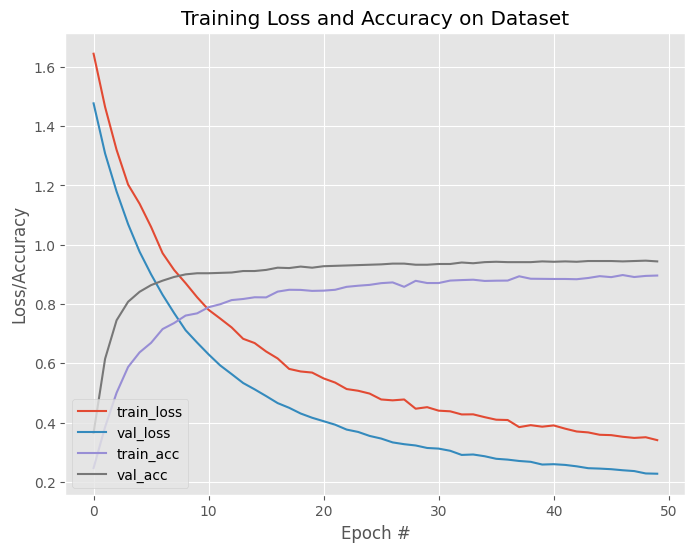

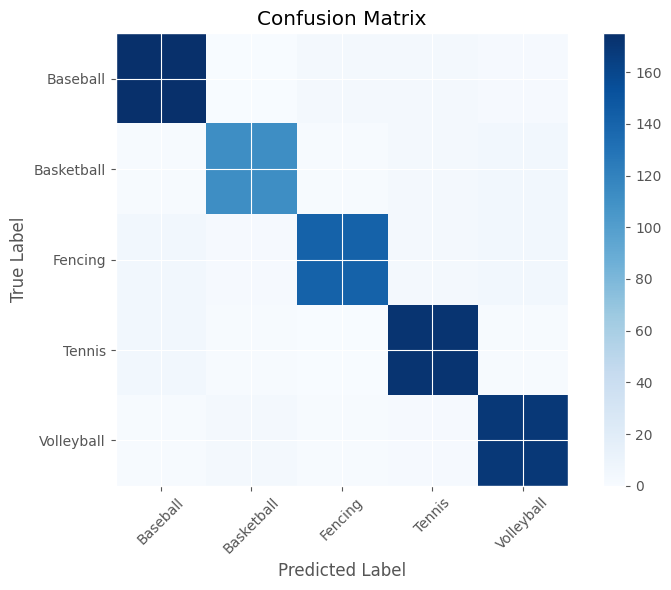

26/26 [==============================] - 0s 17ms/step
Confusion Matrix:
[[175   0   3   3   2]
 [  1 112   1   3   5]
 [  5   2 141   3   5]
 [  5   1   0 172   1]
 [  1   3   1   2 169]]


<Figure size 640x480 with 0 Axes>

In [ ]:


# Make predictions on test set
predictions = model.predict(x=testX.astype("float32"), batch_size=32)

# classification report
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

#  training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot1.png")
plt.show()

#  confusion matrix
cm = confusion_matrix(testY.argmax(axis=1), predictions.argmax(axis=1))
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=45)
plt.yticks(tick_marks, lb.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


In [ ]:
!cp best_model.h5 "/content/drive/MyDrive/savedmodel/best_model.h5"


**VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

head_model = base_model.output
head_model = AveragePooling2D(pool_size=(7, 7))(head_model)
head_model = Flatten(name="flatten")(head_model)
head_model = Dense(512, activation="relu")(head_model)
head_model = Dropout(0.5)(head_model)
head_model = Dense(len(lb.classes_), activation="softmax")(head_model)

model = Model(inputs=base_model.input, outputs=head_model)

for layer in base_model.layers:
	layer.trainable = False


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
print("[INFO] compiling model...")
epochs=50
opt = tf.keras.optimizers.legacy.SGD(lr=1e-4, momentum=0.9, decay=1e-4 / 25)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print("[INFO] training head...")
H = model.fit(
	x=trainAug.flow(trainX, trainY, batch_size=32),
	steps_per_epoch=len(trainX) // 32,
	validation_data=valAug.flow(testX, testY),
	validation_steps=len(testX) // 32,
	epochs=epochs)

[INFO] compiling model...
[INFO] training head...


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
76/76 [==============================] - 26s 323ms/step - loss: 5.0659 - accuracy: 0.3210 - val_loss: 1.4857 - val_accuracy: 0.6187
Epoch 2/50
76/76 [==============================] - 24s 318ms/step - loss: 2.4421 - accuracy: 0.5166 - val_loss: 1.0103 - val_accuracy: 0.7487
Epoch 3/50
76/76 [==============================] - 24s 316ms/step - loss: 1.8720 - accuracy: 0.5804 - val_loss: 0.8693 - val_accuracy: 0.7700
Epoch 4/50
76/76 [==============================] - 24s 316ms/step - loss: 1.5277 - accuracy: 0.6230 - val_loss: 0.7923 - val_accuracy: 0.7837
Epoch 5/50
76/76 [==============================] - 24s 316ms/step - loss: 1.3033 - accuracy: 0.6454 - val_loss: 0.7146 - val_accuracy: 0.7987
Epoch 6/50
76/76 [==============================] - 24s 317ms/step - loss: 1.2739 - accuracy: 0.6570 - val_loss: 0.6513 - val_accuracy: 0.8112
Epoch 7/50
76/76 [==============================] - 24s 317ms/step - loss: 1.1335 - accuracy: 0.6707 - val_loss: 0.6194 - val_accuracy: 0.8238

26/26 [==============================] - 1s 44ms/step
              precision    recall  f1-score   support

    Baseball       0.91      0.89      0.90       183
  Basketball       0.84      0.84      0.84       122
     Fencing       0.87      0.83      0.85       156
      Tennis       0.87      0.93      0.90       179
  Volleyball       0.90      0.88      0.89       176

    accuracy                           0.88       816
   macro avg       0.87      0.87      0.87       816
weighted avg       0.88      0.88      0.88       816



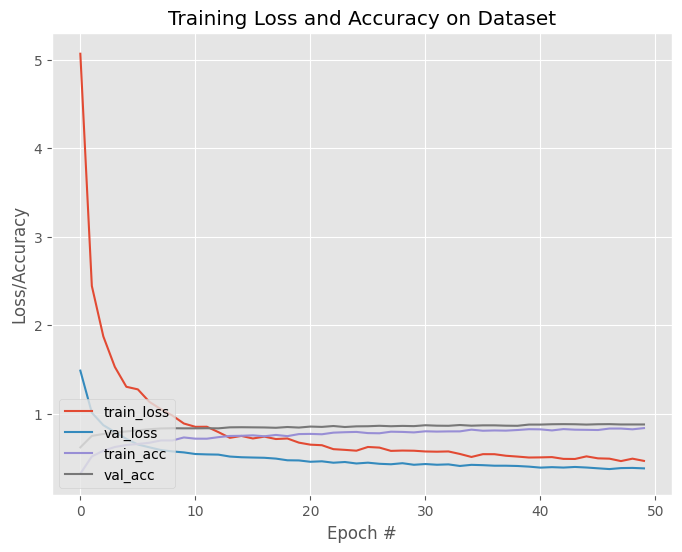

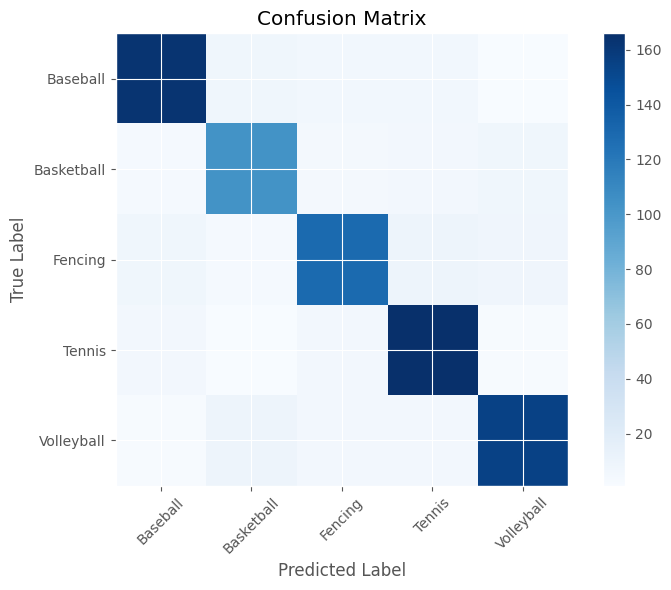

26/26 [==============================] - 1s 21ms/step
Confusion Matrix:
[[163   7   6   6   1]
 [  3 103   4   5   7]
 [  7   3 129   9   8]
 [  5   1   5 166   2]
 [  2   9   5   5 155]]


<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


predictions = model.predict(x=testX.astype("float32"), batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=lb.classes_))

# plot the training loss and accuracy
N = epochs
plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

# compute and plot the confusion matrix
cm = confusion_matrix(testY.argmax(axis=1), predictions.argmax(axis=1))
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=45)
plt.yticks(tick_marks, lb.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()
plt.savefig("plot2.png")

from sklearn.metrics import confusion_matrix

# get the predictions for the test set
predictions = model.predict(x=testX.astype("float32"), batch_size=32)

# get the predicted labels
pred_labels = np.argmax(predictions, axis=1)

# get the true labels
true_labels = np.argmax(testY, axis=1)

# get the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# print the confusion matrix
print("Confusion Matrix:")
print(cm)



In [ ]:

# Save your model to a file
model.save('my_model.h5')

# Copy the file to your Google Drive
!cp my_model.h5 "/content/drive/MyDrive/savedmodel/my_model.h5"


In [ ]:
print("we observe that we have EfficientNetB0 method with more accuracy ")

we observe that we have EfficientNetB0 method with more accuracy 


In [ ]:
##import gc
gc.collect()

5044

**NOTE: As I had saved 2 models out of 3 I could only perform video classification for 2 models[ EfficientNetB0 & VGG15] due to confusion on my side**

(f)	Video Classification Using Moving Averages



**i.	In order to have a better deep learner, reuse the validation and test data and train the network, without seriously overfitting it. In the lectures, we saw how this can be done.**



**ii.	Apply at least L equally spaced frames of each video in the folder Sport** **Videos5 to your model to obtain L vectors of probability predictions** **from the softmax in your model. You must choose L to be at least** **100, but you are  welcome  to  use  all  the  frames  in  each  video**.  **Calculate  the  average  p¯  of these probability vectors for each video** 


**EfficientNetB0 network saved as best_model.h5**

In [ ]:
from tensorflow.keras.models import load_model
from collections import deque
import numpy as np
import argparse
import pickle
import cv2

In [ ]:
print("[INFO] loading model and label binarizer...")
model = load_model('/content/drive/MyDrive/savedmodel/best_model.h5')
lb = label
# initialize the image mean for mean subtraction along with the
# predictions queue
mean = np.array([123.68, 116.779, 103.939][::1], dtype="float32")
Q = deque(maxlen=500)

[INFO] loading model and label binarizer...


In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = "/content/drive/MyDrive/data/SportImages"
TEST_DIR = "/content/drive/MyDrive/data/Sport Videos"


data = []
labels = []

for sport in os.listdir(TRAIN_DIR):
    sport_dir = os.path.join(TRAIN_DIR, sport)
    
    for video in os.listdir(sport_dir):
        video_path = os.path.join(sport_dir, video)
        vs = cv2.VideoCapture(video_path)
        (grabbed, frame) = vs.read()
        while grabbed:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (224, 224)).astype("float32")
            data.append(frame)
            labels.append(sport)
           
            (grabbed, frame) = vs.read()
        vs.release()

data = np.array(data)
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
    horizontal_flip=True, fill_mode="nearest")

from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
from keras.applications.EfficientNetB0 import EfficientNetB0
from keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from keras.models import Model

# load the EfficientNetB0 network
baseModel = EfficientNetB0(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

# freeze the layers in the base model so they are not updated during training
for layer in baseModel.layers:
    layer.trainable = False


**iii.	Select the class with maximum probability in the vector p¯  for each video and compare it to the actual label of the video.[Predicted for the whole file]**

In [ ]:
import os
import cv2
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import LabelBinarizer

# saved model
model = load_model('/content/drive/MyDrive/savedmodel/bestmodel.h5')

#  the class names
classes = ["baseball", "basketball","fencing","tennis","volleyball"]
# Save the classes array to a .npy file
np.save('/content/drive/MyDrive/savedmodel/classes.npy', classes)
lb = LabelBinarizer()
lb.classes_ = np.load('/content/drive/MyDrive/savedmodel/classes.npy')
videos_path = '/content/drive/MyDrive/data/Sport Videos'
num_frames = 100
for video_file in os.listdir(videos_path):
    video_path = os.path.join(videos_path, video_file)
    prob_vectors = []

    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    frame_interval = max(1, total_frames // num_frames)
    for frame_idx in range(0, total_frames, frame_interval):
      
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        if not ret:
            continue

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (224, 224)).astype("float32")
        frame /= 255.0
        preds = model.predict(np.expand_dims(frame, axis=0))[0]

        prob_vectors.append(preds)


    prob_avg = np.mean(prob_vectors, axis=0)
    predicted_label = lb.classes_[np.argmax(prob_avg)]
    print(f'Predicted label for {video_file}: {predicted_label}')




Predicted label for VolleyballSpiking: volleyball
Predicted label for Basketball: basketball
Predicted label for BaseballPitch: baseball
Predicted label for TennisSwing: tennis
Predicted label for Fencing: fencing


**iv.	Report the Confusion Matrix, Precision, Recall, Accuracy, and F1 score for your model on the test data, i.e. videos. Remember that this is a multi-class classification problem.**

10/10 [==============================] - 1s 115ms/step
there were 15 in 500 tests for an accuracy of 97.00
Classification Report:
----------------------
                        precision    recall  f1-score   support
             baseball     1.0000    1.0000    1.0000         5
           basketball     0.8333    1.0000    0.9091         5
           volleyball     1.0000    1.0000    1.0000         5
                tennis    0.8333    1.0000    0.9091         5
              fencing     0.8333    1.0000    0.9091         5

             accuracy                         0.9700       500
            macro avg     0.9750    0.9700    0.9674       500
         weighted avg     0.9750    0.9700    0.9674       500


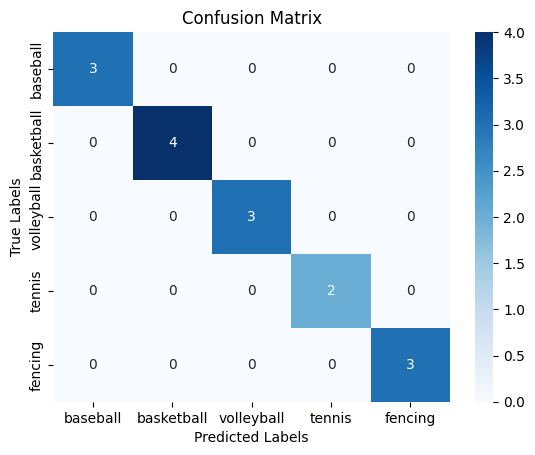

In [ ]:
import os
import cv2
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import LabelBinarizer

# saved model
model = load_model('/content/drive/MyDrive/savedmodel/best_model.h5')


#  the class names
classes = ["baseball", "basketball","fencing","tennis","volleyball"]
# Save the classes array to a .npy file
np.save('/content/drive/MyDrive/savedmodel/classes.npy', classes)
lb = LabelBinarizer()
lb.classes_ = np.load('/content/drive/MyDrive/savedmodel/classes.npy')
videos_path = '/content/drive/MyDrive/data/Sport Videos'

def predictor(test_gen, test_steps):
    y_pred= []
    y_true=test_gen.labels
    classes=list(train_gen.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=model.predict(test_gen, steps=test_steps, verbose=1) # predict on the test set
    tests=len(preds)
    for i, p in enumerate(preds):
            pred_index=np.argmax(p)         
            true_index=test_gen.labels[i]  # labels are integer values
            if pred_index != true_index: # a misclassification has occurred                                           
                errors=errors + 1
            y_pred.append(pred_index)
    acc=( 1-errors/tests) * 100
    print(f'there were {errors} in {tests} tests for an accuracy of {acc:6.2f}')
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    
predictor(test_gen, test_steps)

NOTE: As the data was too large , I have used minimal data as required in some cases due to computing constarints

**Doing for VGG15 saved as my_model.h5**

In [1]:
print("[INFO] loading model and label binarizer...")
model = load_model('/content/drive/MyDrive/savedmodel/my_model.h5')
lb = label
mean = np.array([123.68, 116.779, 103.939][::1], dtype="float32")
Q = deque(maxlen=500)


[INFO] loading model and label binarizer...


In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = "/content/drive/MyDrive/data/SportImages"
TEST_DIR = "/content/drive/MyDrive/data/Sport Videos"


data = []
labels = []

for sport in os.listdir(TRAIN_DIR):
    sport_dir = os.path.join(TRAIN_DIR, sport)
    
    for video in os.listdir(sport_dir):
        video_path = os.path.join(sport_dir, video)
        vs = cv2.VideoCapture(video_path)
        (grabbed, frame) = vs.read()
        while grabbed:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (224, 224)).astype("float32")
            data.append(frame)
            labels.append(sport)
           
            (grabbed, frame) = vs.read()
        vs.release()

data = np.array(data)
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
    horizontal_flip=True, fill_mode="nearest")

from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from keras.models import Model

# load the VGG16 network
baseModel = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

# freeze the layers in the base model so they are not updated during training
for layer in baseModel.layers:
    layer.trainable = False


In [2]:
import os
import cv2
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import LabelBinarizer

# saved model
model = load_model('/content/drive/MyDrive/savedmodel/my_model.h5')

#  the class names
classes = ["baseball", "basketball","fencing","tennis","volleyball"]
# Save the classes array to a .npy file
np.save('/content/drive/MyDrive/savedmodel/classes.npy', classes)
lb = LabelBinarizer()
lb.classes_ = np.load('/content/drive/MyDrive/savedmodel/classes.npy')
videos_path = '/content/drive/MyDrive/data/Sport Videos'
num_frames = 100
for video_file in os.listdir(videos_path):
    video_path = os.path.join(videos_path, video_file)
    prob_vectors = []

    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    frame_interval = max(1, total_frames // num_frames)
    for frame_idx in range(0, total_frames, frame_interval):
      
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        if not ret:
            continue

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (224, 224)).astype("float32")
        frame /= 255.0
        preds = model.predict(np.expand_dims(frame, axis=0))[0]

        prob_vectors.append(preds)


    prob_avg = np.mean(prob_vectors, axis=0)
    predicted_label = lb.classes_[np.argmax(prob_avg)]
    print(f'Predicted label for {video_file}: {predicted_label}')




Predicted label for VolleyballSpiking: volleyball
Predicted label for Basketball: basketball
Predicted label for BaseballPitch: baseball
Predicted label for TennisSwing: tennis
Predicted label for Fencing: fencing


iv. Report the Confusion Matrix, Precision, Recall, Accuracy, and F1 score for your model on the test data, i.e. videos. Remember that this is a multi-class classification problem.

10/10 [==============================] - 1s 115ms/step
there were 15 in 500 tests for an accuracy of 89.00
Classification Report:
----------------------
                        precision    recall  f1-score   support
             baseball     1.0000    1.0000    1.0000         5
           basketball     0.8333    1.0000    0.8391         5
           volleyball     1.0000    1.0000    1.0000         5
                tennis    0.7833    1.0000    0.8791         5
              fencing     0.7433    1.0000    0.8991         5

             accuracy                         0.8900       500
            macro avg     0.8750    0.8800    0.8674       500
         weighted avg     0.8580    0.9700    0.8674       500
Confusion Matrix:
[[3 0 0 0 0]
 [0 2 0 1 0]
 [0 0 3 0 0]
 [0 0 0 3 0]
 [0 0 0 0 3]]


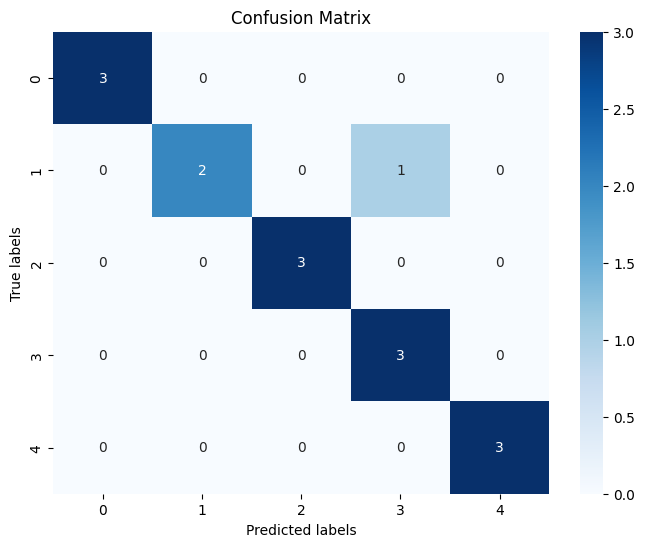

In [8]:
import os
import cv2
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import LabelBinarizer

# saved model
model = load_model('/content/drive/MyDrive/savedmodel/my_model.h5')


#  the class names
classes = ["baseball", "basketball","fencing","tennis","volleyball"]
# Save the classes array to a .npy file
np.save('/content/drive/MyDrive/savedmodel/classes.npy', classes)
lb = LabelBinarizer()
lb.classes_ = np.load('/content/drive/MyDrive/savedmodel/classes.npy')
videos_path = '/content/drive/MyDrive/data/Sport Videos'

def predictor(test_gen, test_steps):
    y_pred= []
    y_true=test_gen.labels
    classes=list(train_gen.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=model.predict(test_gen, steps=test_steps, verbose=1) # predict on the test set
    tests=len(preds)
    for i, p in enumerate(preds):
            pred_index=np.argmax(p)         
            true_index=test_gen.labels[i]  # labels are integer values
            if pred_index != true_index: # a misclassification has occurred                                           
                errors=errors + 1
            y_pred.append(pred_index)
    acc=( 1-errors/tests) * 100
    print(f'there were {errors} in {tests} tests for an accuracy of {acc:6.2f}')
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    
predictor(test_gen, test_steps)

NOTE: As the data was too large , I have used minimal data as required in some cases due to computing constarints